In [24]:
import json
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [25]:
data_files = os.listdir("Locofy_MLE_Challenge_Groupings/Data/")
data_list = {}

for file in data_files:
    path = os.path.join("Locofy_MLE_Challenge_Groupings/Data/", file)
    with open(path) as f:
        data_list[file] = json.load(f)

In [26]:
data_list.keys()

dict_keys(['airbnb.json', 'wego.json', 'uber.json', 'retool.json'])

In [27]:
airbnb = data_list['airbnb.json']
wego = data_list['wego.json']
uber = data_list['uber.json']
retool = data_list['retool.json']

## airbnb

In [28]:
def analyze_dataset(dataset, name):
    def sort_dict(input_dict):
        items = sorted(input_dict.items(), key= lambda x: x[0])
        return dict(items)
    direction = np.array([each['direction'] for each in dataset])
    unique, counts = np.unique(direction, return_counts=True)

    ## Make dir to save images
    if not os.path.exists(name):
        os.makedirs(name)

    ## Statistic of different items
    item_list = {}
    for each_sample in dataset:
        inp = each_sample['input']
        for each in inp:
            if each[0] not in item_list.keys():
                item_list[each[0]] = [each[1]]
            else:
                item_list[each[0]].append(each[1])

    fig = plt.figure()
    item_list = sort_dict(item_list)
    ax = fig.add_subplot(2, 2, 1)
    ax.set_title("Statistic of different items")
    ax.boxplot(item_list.values())
    ax.set_xticklabels(item_list.keys())
    # for i, key in enumerate(item_list.keys()):
    #     ax.boxplot(np.array(item_list[key]), positions=[i], whiskerprops=dict(color="blue"), capprops=dict(color="blue"), medianprops=dict(color="blue"), boxprops=dict(color="blue"), flierprops=dict(markeredgecolor="blue"))
    # plt.savefig(f"{name}/Statistic of different items.png")

    num_items = {item[0]: len(item[1]) for item in item_list.items()}

    # fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 2)
    num_items = sort_dict(num_items)
    ax1.set_title("Number of appearances")

    ax1.bar(num_items.keys(), num_items.values())    
    # plt.savefig(f"{name}/Number of apperances.png")

    # Times grouped
    times_group = {}
    for each_sample in dataset:
        output_sample = each_sample['output']
        for each in output_sample:
            if isinstance(each, list):
                for item in each:
                    if item not in times_group.keys():
                        times_group[item] = 1
                    else:
                        times_group[item] += 1

    # fig = plt.figure()
    ax2 = fig.add_subplot(2, 2, 3)
    times_group = sort_dict(times_group)
    ax2.set_title("Times grouped")
    ax2.bar(times_group.keys(), times_group.values()) 
    # plt.savefig(f"{name}/Times grouped.png")

    # Percent grouped
    percent_grouped = {}
    for key in times_group.keys():
        percent_grouped[key] = times_group[key] / num_items[key]

    # fig = plt.figure()
    ax3 = fig.add_subplot(2, 2, 4)
    percent_grouped = sort_dict(percent_grouped)
    ax3.set_title("Percent grouped")
    ax3.bar(percent_grouped.keys(), percent_grouped.values()) 
    fig.tight_layout()
    plt.savefig(f"{name}/Statistics.png")

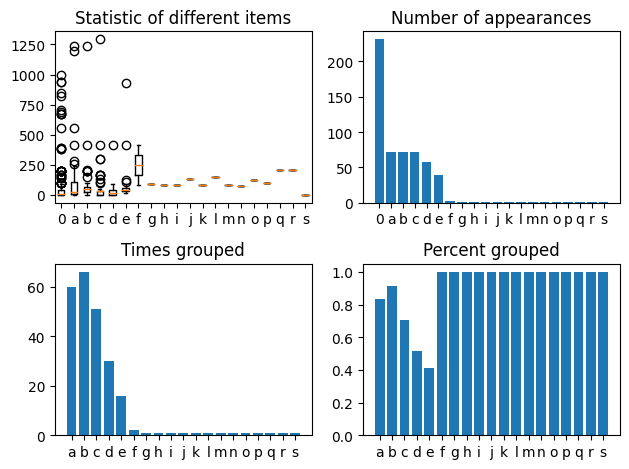

In [29]:
analyze_dataset(airbnb, "airbnb")

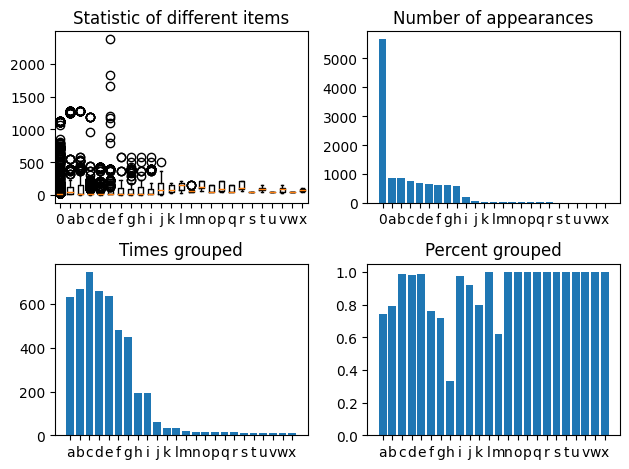

In [30]:
analyze_dataset(wego, "wego")

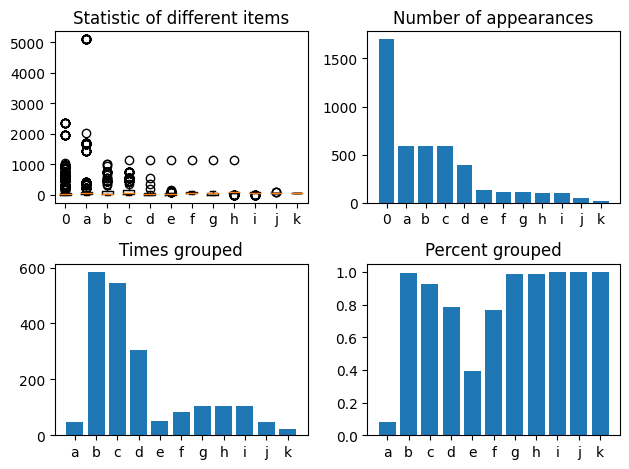

In [31]:
analyze_dataset(uber, "uber")

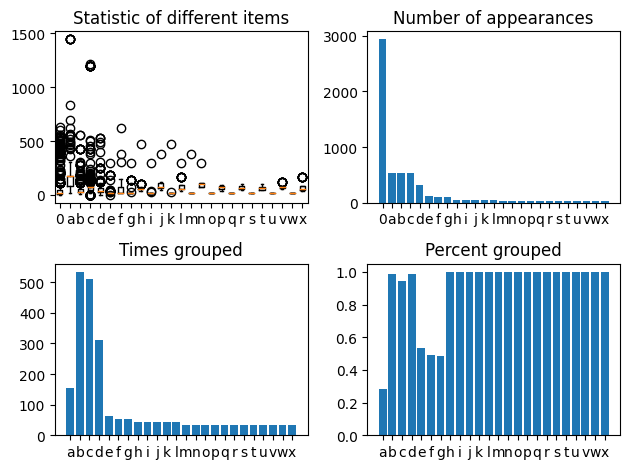

In [32]:
analyze_dataset(retool, "retool")

## Insights
* There are small element whose length is sufficient small and they are often grouped together. The percent grouped of that items are always nearly 1 in all datasets.
* The problem is that the element "a" has distinct behaviors in different datasets.
* Need investigate more the correlation between the direction and the percent grouped of item a.

In [33]:
def investigate_a_element(dataset, name):
    df_dict = {"direction": [], "grouped": []}
    for each_sample in dataset:
        list_of_item_input = [x[0] for x in each_sample["input"]]
        if "a" in list_of_item_input:
            df_dict["direction"].append(each_sample["direction"])
            df_dict["grouped"].append(0)
            for item in each_sample["output"]:
                if isinstance(item, list):
                    if "a" in item:
                        df_dict["grouped"][-1] = 1
                        break
    return pd.DataFrame(df_dict)

In [34]:
airbnb_df = investigate_a_element(airbnb, "airbnb")
wego_df = investigate_a_element(wego, "wego")
retool_df = investigate_a_element(retool, "retool")
uber_df = investigate_a_element(uber, "uber")

In [35]:
wego_df.groupby(["direction", "grouped"]).size()

direction   grouped
horizontal  0          174
            1          630
vertical    0           44
dtype: int64

In [36]:
airbnb_df.groupby(["direction", "grouped"]).size()

direction   grouped
horizontal  0          11
            1          56
vertical    0           1
            1           4
dtype: int64

In [37]:
retool_df.groupby(["direction", "grouped"]).size()

direction   grouped
horizontal  0           36
            1          129
vertical    0          351
            1           25
dtype: int64

In [38]:
uber_df.groupby(["direction", "grouped"]).size()

direction   grouped
horizontal  0          309
            1           49
vertical    0          229
dtype: int64

* Obiviously, "a" item is rarely grouped when it is vertical